In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
print("Setup Complete")
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

sns.set_palette('hls')

Setup Complete


In [2]:
Diabetes = pd.read_csv('../input/diabetes-dataset/diabetes.csv') 
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#trying to check for missing values, but find didn't any.
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Backgroung information
A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.

For pregnant women, we suggest the following target for women testing blood glucose levels during pregnancy: Before a meal: 95 mg/dl or less. One hour after a meal: 140 mg/dl or less. Two hours after a meal: 120 mg/dl or less.

In [8]:
#Lets run a scatter plots to see variables that corrolate.
#first, i want to have the list of columns

numeric_var = Diabetes.select_dtypes(include=[np.number]).columns.to_list()
for var in numeric_var:
    print(var)


Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


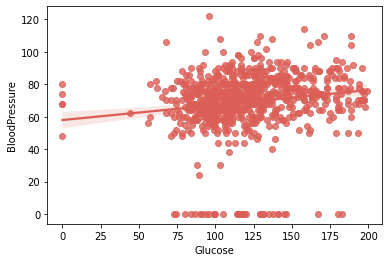

In [9]:
#Now we are plotting Glucose level vs Blood pressure

ax = sns.regplot(x = 'Glucose', y = 'BloodPressure', data = Diabetes)

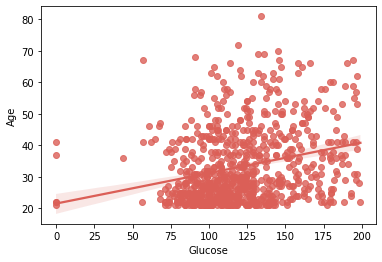

In [10]:
#Now we are plotting Glucose level vs Age

ax = sns.regplot(x = 'Glucose', y = 'Age', data = Diabetes)

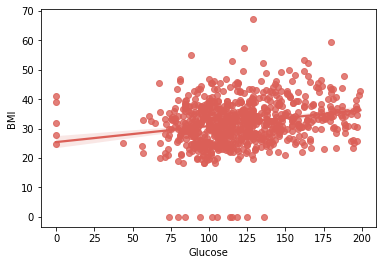

In [11]:
#Now we are plotting Glucose level vs BMI

ax = sns.regplot(x = 'Glucose', y = 'BMI', data = Diabetes)

In [12]:
#I am trying to use scatter matrix
columns = ['Glucose', 'Age', 'BMI']
new_Diabetes = Diabetes[columns]
new_Diabetes= new_Diabetes.dropna(axis = 0, how='any')
new_Diabetes


,Glucose,Age,BMI
0,148,50,33.6
1,85,31,26.6
2,183,32,23.3
3,89,21,28.1
4,137,33,43.1
...,...,...,...
763,101,63,32.9
764,122,27,36.8
765,121,30,26.2
766,126,47,30.1


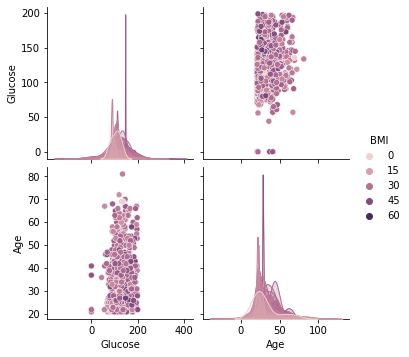

In [13]:
sns.pairplot(new_Diabetes, hue='BMI')
#Below is the scater matrix

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


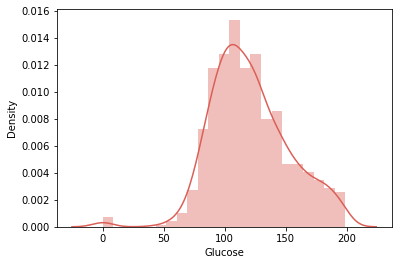

In [14]:
#trying to visualize with histogram
sns.distplot(Diabetes.Glucose.dropna(axis=0));

In [15]:
#it appears skewed to the right. perhaps there are outliers

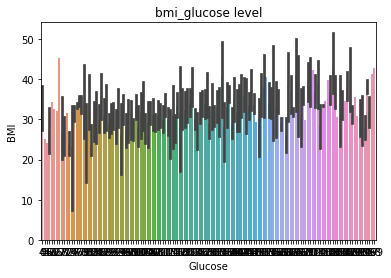

In [16]:
#I will plot a bar chat to see the relationship between the variables

p = sns.barplot(x = 'Glucose', y= 'BMI',data = Diabetes, estimator=np.mean );
p.set(title = 'bmi_glucose level')
p.set_xticklabels(p.get_xticklabels());